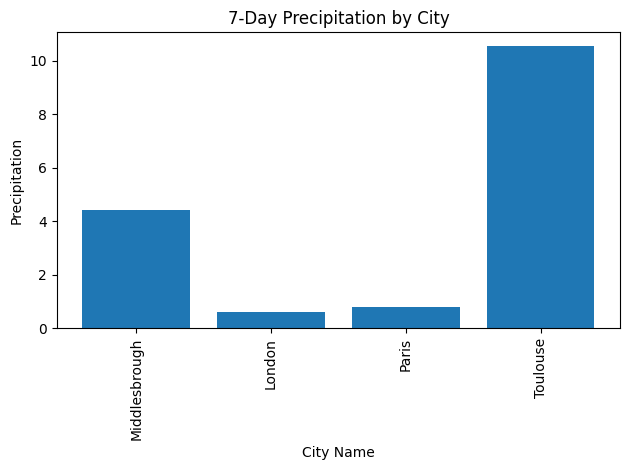

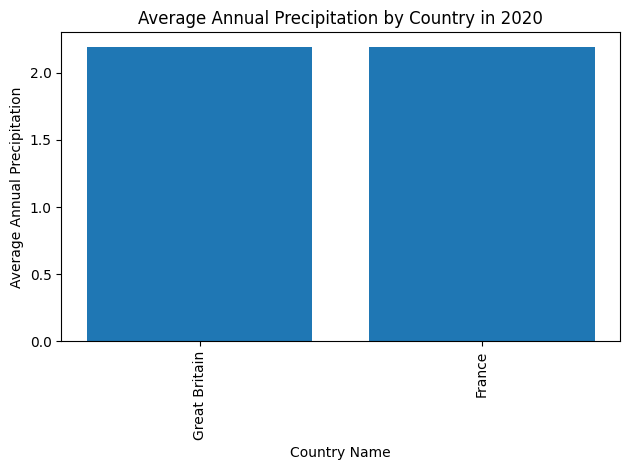

no such table: cities
no such table: daily_weather_entries
no such table: cities
no such table: daily_weather_entries
no such table: cities
no such table: daily_weather_entries
no such table: cities
no such table: daily_weather_entries
no such table: cities
no such table: daily_weather_entries
no such table: cities
no such table: daily_weather_entries


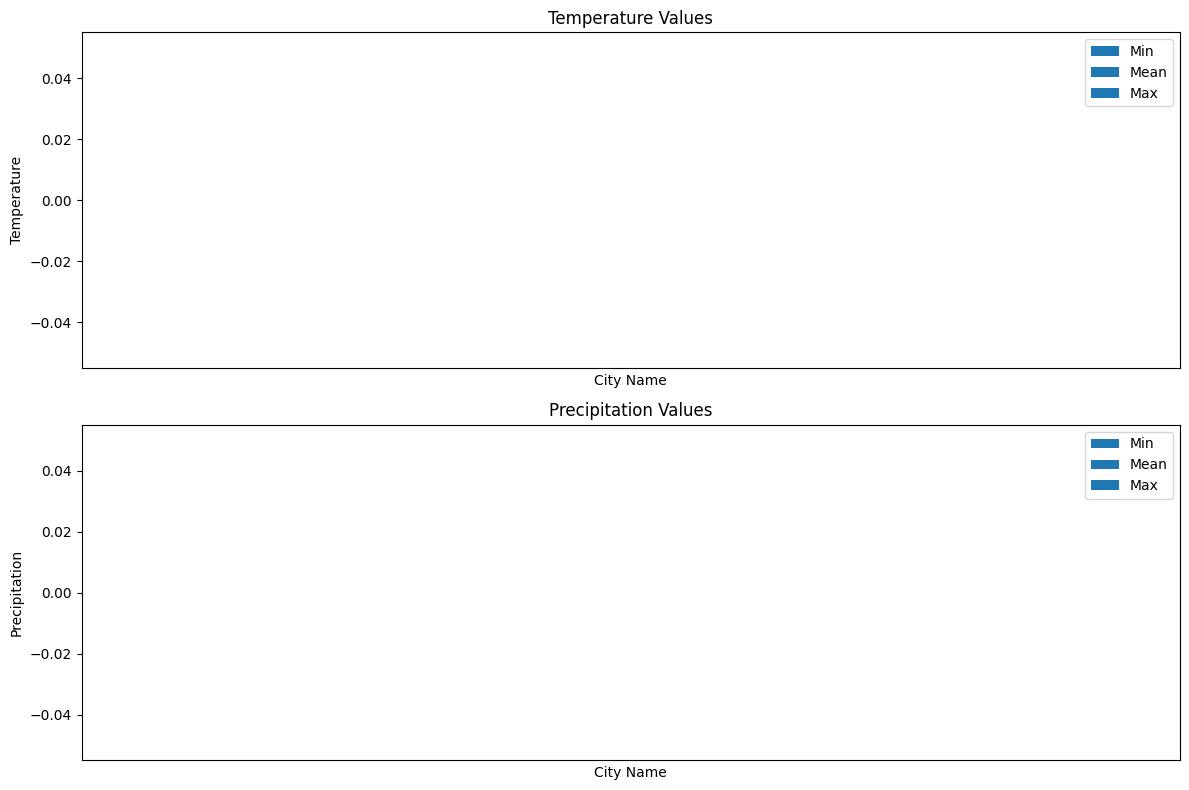

no such table: daily_weather_entries
No data found for the specified city and date.


In [1]:

import matplotlib.pyplot as plt
import sqlite3

# Connect to the SQLite database
connection = sqlite3.connect(r"C:\Python Data\CIS4044-N-ICA\db\CIS4044-N-SDI-OPENMETEO-PARTIAL.db")

# Define a function to calculate the average 7-day precipitation
def average_seven_day_precipitation(city_id, start_date):
    try:
        cursor = connection.cursor()
        query = "SELECT AVG(precipitation) FROM daily_weather_entries WHERE city_id = ? AND date BETWEEN ? AND ?"
        end_date = start_date[:4] + "-" + start_date[5:7] + "-" + str(int(start_date[8:10]) + 7)
        cursor.execute(query, (city_id, start_date, end_date))
        result = cursor.fetchone()
        return result[0] if result else None
    except sqlite3.OperationalError as ex:
        print(ex)
        return None

# Define a function to get the city name
def get_city_name(city_id):
    try:
        cursor = connection.cursor()
        query = "SELECT name FROM cities WHERE id = ?"
        cursor.execute(query, (city_id,))
        result = cursor.fetchone()
        return result[0] if result else None
    except sqlite3.OperationalError as ex:
        print(ex)
        return None

# Define a function to select all countries
def select_all_countries():
    try:
        cursor = connection.cursor()
        query = "SELECT * from countries"
        cursor.execute(query)
        return cursor.fetchall()
    except sqlite3.OperationalError as ex:
        print(ex)
        return None

# Define a function to calculate the average annual precipitation by city
def average_annual_precipitation_by_city(city_id, year):
    try:
        cursor = connection.cursor()
        query = """SELECT AVG(precipitation) FROM daily_weather_entries WHERE city_id = ? AND strftime('%Y', date) = ?"""
        cursor.execute(query, (city_id, year))
        result = cursor.fetchone()
        return result[0] if result and result[0] is not None else None
    except sqlite3.OperationalError as ex:
        print(ex)
        return None

# City IDs
city_ids = [1, 2, 3, 4, 5, 6]

# Generate dates in 2020
start_dates = ["2021-01-01", "2022-01-02", "2020-01-03", "2022-01-04", "2020-01-07"]

city_names = []
precipitations = []

for city_id, start_date in zip(city_ids, start_dates):
    city_name = get_city_name(city_id)
    precipitation = average_seven_day_precipitation(city_id, start_date)
    if city_name and precipitation is not None:
        city_names.append(city_name)
        precipitations.append(precipitation)

plt.bar(city_names, precipitations)
plt.xlabel('City Name')
plt.ylabel('Precipitation')
plt.title('7-Day Precipitation by City')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

year = "2020"
countries = select_all_countries()
country_names = []
precipitations = []

for country in countries:
    country_id = country[0]
    country_name = country[1]
    city_id = 1
    precipitation = average_annual_precipitation_by_city(city_id, year)
    if country_name and precipitation is not None:
        country_names.append(country_name)
        precipitations.append(precipitation)

plt.bar(country_names, precipitations)
plt.xlabel('Country Name')
plt.ylabel('Average Annual Precipitation')
plt.title(f'Average Annual Precipitation by Country in {year}')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


def get_temperature_and_precipitation_values(connection, city_id):
    try:
        query = """ 
        SELECT MIN(mean_temp), MAX(mean_temp), AVG(mean_temp), 
        MIN(precipitation), MAX(precipitation), AVG(precipitation)
        FROM daily_weather_entries 
        WHERE city_id = ?
        """
        cursor = connection.cursor()
        cursor.execute(query, (city_id,))
        result = cursor.fetchone()
        
        return result if result else None
    
    except sqlite3.OperationalError as ex:
        print(ex)
        return None

def get_city_name(connection, city_id):
    try:
        query = "SELECT name FROM cities WHERE id = ?"
        cursor = connection.cursor()
        cursor.execute(query, (city_id,))
        result = cursor.fetchone()
        
        return result[0] if result else None
    
    except sqlite3.OperationalError as ex:
        print(ex)
        return None

connection = sqlite3.connect(r"File.db")
city_ids = [1, 2, 3, 4, 5, 6]  

city_names = []
temperature_min_values = []
temperature_max_values = []
temperature_mean_values = []
precipitation_min_values = []
precipitation_max_values = []
precipitation_mean_values = []
for city_id in city_ids:
    city_name = get_city_name(connection, city_id)
    values = get_temperature_and_precipitation_values(connection, city_id)
    
    if city_name and values:
        city_names.append(city_name)
        temperature_min_values.append(values[0])
        temperature_max_values.append(values[1])
        temperature_mean_values.append(values[2])
        precipitation_min_values.append(values[3])
        precipitation_max_values.append(values[4])
        precipitation_mean_values.append(values[5])

# Create a figure and axis object
fig, ax = plt.subplots(2, figsize=(12, 8))

# Create a grouped bar chart for temperature values
bar_width = 0.2
x = range(len(city_names))
ax[0].bar([i - bar_width for i in x], temperature_min_values, bar_width, label='Min')
ax[0].bar(x, temperature_mean_values, bar_width, label='Mean')
ax[0].bar([i + bar_width for i in x], temperature_max_values, bar_width, label='Max')
ax[0].set_title('Temperature Values')
ax[0].set_xlabel('City Name')
ax[0].set_ylabel('Temperature')
ax[0].set_xticks(x)
ax[0].set_xticklabels(city_names, rotation=90)
ax[0].legend()

# Create a grouped bar chart for precipitation values
ax[1].bar([i - bar_width for i in x], precipitation_min_values, bar_width, label='Min')
ax[1].bar(x, precipitation_mean_values, bar_width, label='Mean')
ax[1].bar([i + bar_width for i in x], precipitation_max_values, bar_width, label='Max')
ax[1].set_title('Precipitation Values')
ax[1].set_xlabel('City Name')
ax[1].set_ylabel('Precipitation')
ax[1].set_xticks(x)
ax[1].set_xticklabels(city_names, rotation=90)
ax[1].legend()

plt.tight_layout()
plt.show()


def get_daily_temperature_values(connection, city_id, date):
    try:
        query = """ 
            SELECT date, min_temp, max_temp 
            FROM daily_weather_entries 
            WHERE city_id = ? AND date LIKE ?
        """
        cursor = connection.cursor()
        cursor.execute(query, (city_id, f"{date}%"))
        results = cursor.fetchall()
        
        if results:
            dates = [result[0] for result in results]
            min_temperatures = [result[1] for result in results]
            max_temperatures = [result[2] for result in results]
            
            return dates, min_temperatures, max_temperatures
        else:
            return [], [], []
    
    except sqlite3.OperationalError as ex:
        print(ex)
        return [], [], []

connection = sqlite3.connect(r"File.db")
city_id = 1
date = "2022-01"

dates, min_temperatures, max_temperatures = get_daily_temperature_values(connection, city_id, date)

if dates and min_temperatures and max_temperatures:
    plt.figure(figsize=(12, 6))
    plt.plot(dates, min_temperatures, label='Min Temperature')
    plt.plot(dates, max_temperatures, label='Max Temperature')
    plt.xlabel('Date')
    plt.ylabel('Temperature')
    plt.title(f'Daily Min and Max Temperature for City {city_id} in {date}')
    plt.legend()
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
else:
    print("No data found for the specified city and date.")

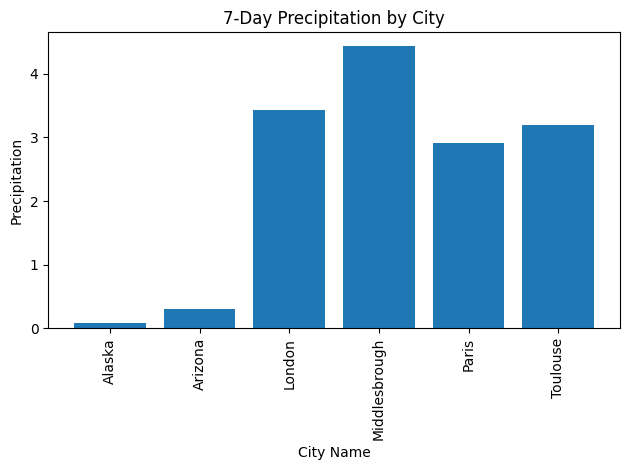

no such column: country_id
no such column: country_id
no such column: country_id


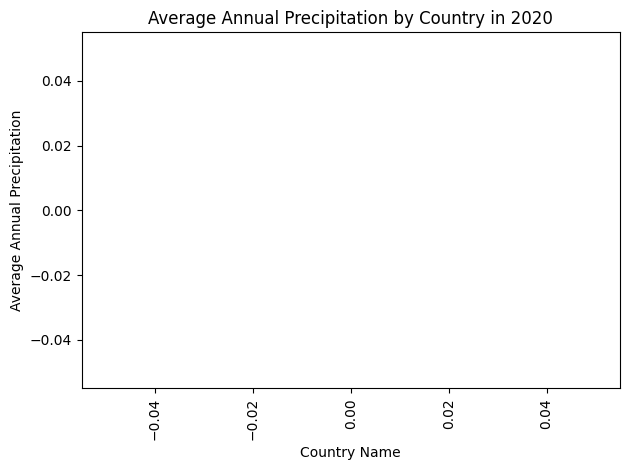

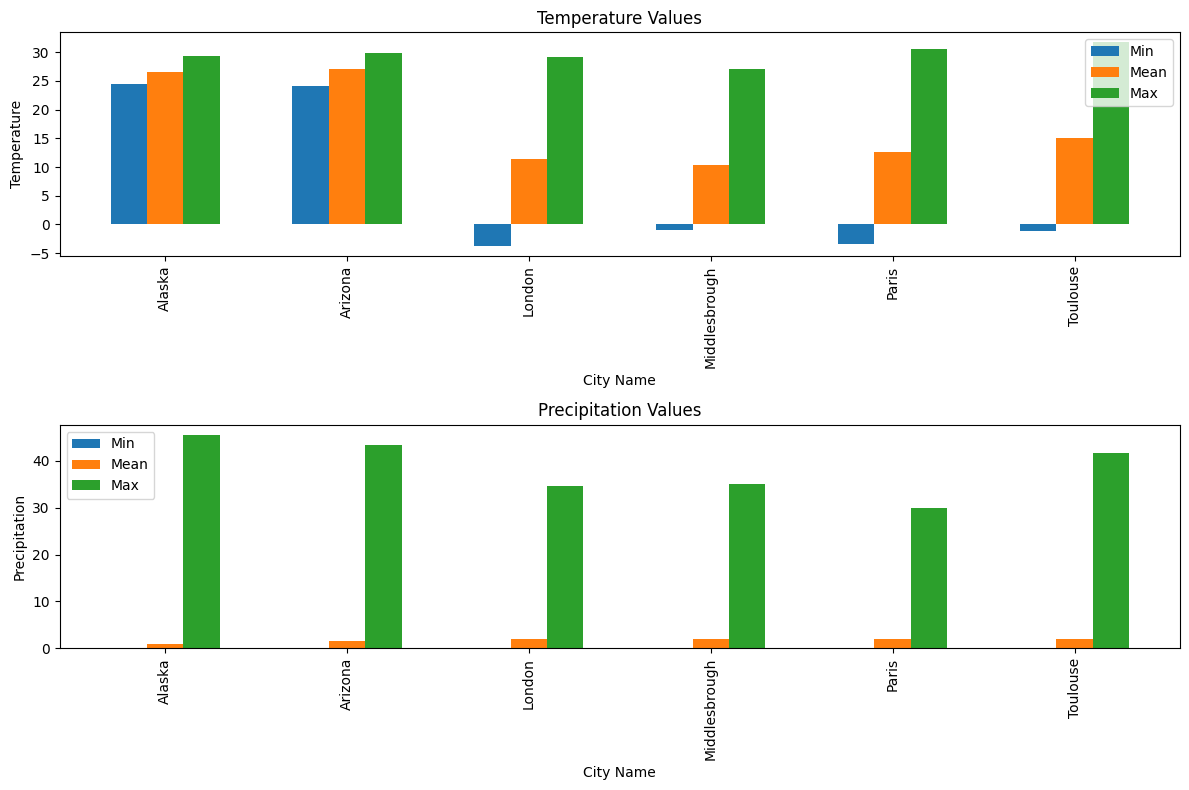

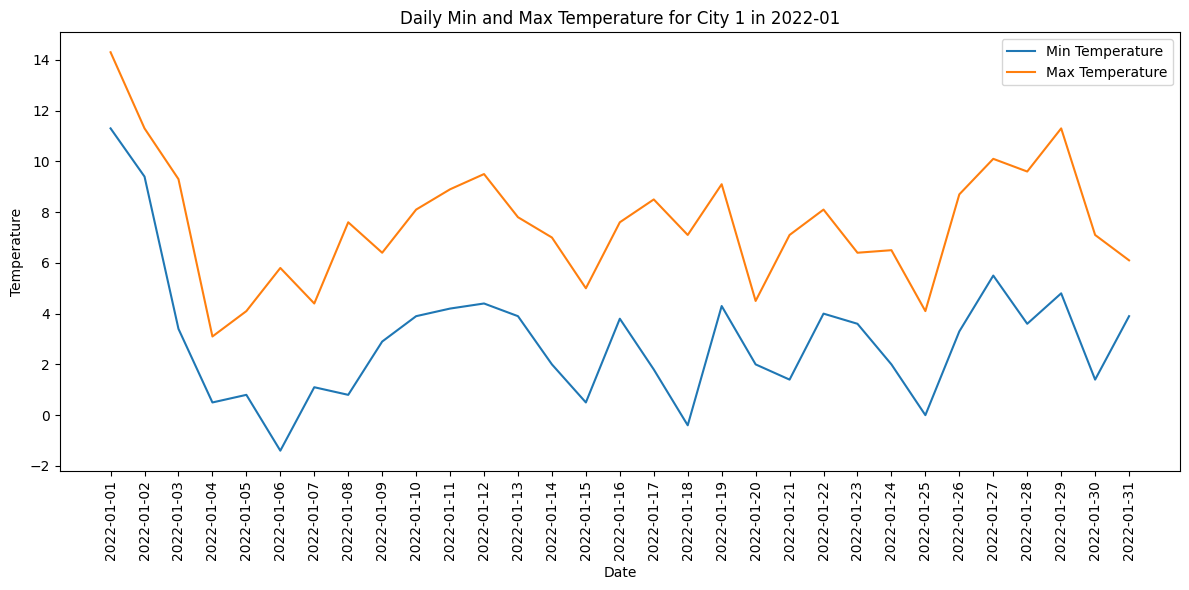

In [1]:



# Define a function to select all countries
def select_all_countries():
    try:
        cursor = connection.cursor()
        query = "SELECT * from countries"
        cursor.execute(query)
        return cursor.fetchall()
    except sqlite3.OperationalError as ex:
        print(ex)
        return None

# Define a function to calculate the average annual precipitation by city
def average_annual_precipitation_by_city(city_id, year):
    try:
        cursor = connection.cursor()
        query = """SELECT AVG(precipitation) FROM daily_weather_entries WHERE city_id = ? AND strftime('%Y', date) = ?"""
        cursor.execute(query, (city_id, year))
        result = cursor.fetchone()
        return result[0] if result and result[0] is not None else None
    except sqlite3.OperationalError as ex:
        print(ex)
        return None

# Define a function to calculate the average annual precipitation by country
def average_annual_precipitation_by_country(country_id, year):
    try:
        cursor = connection.cursor()
        query = """SELECT AVG(precipitation) FROM daily_weather_entries WHERE country_id = ? AND strftime('%Y', date) = ?"""
        cursor.execute(query, (country_id, year))
        result = cursor.fetchone()
        return result[0] if result and result[0] is not None else None
    except sqlite3.OperationalError as ex:
        print(ex)
        return None
    

# Get all city IDs from the database
def get_all_city_ids():
    try:
        cursor = connection.cursor()
        query = "SELECT id FROM cities"
        cursor.execute(query)
        return [row[0] for row in cursor.fetchall()]
    except sqlite3.OperationalError as ex:
        print(ex)
        return []
    

def get_temperature_and_precipitation_values(connection, city_id):
    try:
        query = """ 
        SELECT MIN(mean_temp), MAX(mean_temp), AVG(mean_temp), 
        MIN(precipitation), MAX(precipitation), AVG(precipitation)
        FROM daily_weather_entries 
        WHERE city_id = ?
        """
        cursor = connection.cursor()
        cursor.execute(query, (city_id,))
        result = cursor.fetchone()
        
        return result if result else None
    
    except sqlite3.OperationalError as ex:
        print(ex)
        return None

def get_city_name(connection, city_id):
    try:
        query = "SELECT name FROM cities WHERE id = ?"
        cursor = connection.cursor()
        cursor.execute(query, (city_id,))
        result = cursor.fetchone()
        
        return result[0] if result else None
    
    except sqlite3.OperationalError as ex:
        print(ex)
        return None


def get_daily_temperature_values(connection, city_id, date):
    try:
        query = """ 
            SELECT date, min_temp, max_temp 
            FROM daily_weather_entries 
            WHERE city_id = ? AND date LIKE ?
        """
        cursor = connection.cursor()
        cursor.execute(query, (city_id, f"{date}%"))
        results = cursor.fetchall()
        
        if results:
            dates = [result[0] for result in results]
            min_temperatures = [result[1] for result in results]
            max_temperatures = [result[2] for result in results]
            
            return dates, min_temperatures, max_temperatures
        else:
            return [], [], []
    
    except sqlite3.OperationalError as ex:
        print(ex)
        return [], [], []


# Graph 2 : Bar Chart for Set of cities
# City_ids
city_ids = get_all_city_ids()

# Generate dates in 2020
start_date = "2021-01-01"

city_names = []
precipitations = []

for city_id in city_ids:
    city_name = get_city_name(connection, city_id)
    precipitation = average_seven_day_precipitation(city_id, start_date)
    if city_name and precipitation is not None:
        city_names.append(city_name)
        precipitations.append(precipitation)

plt.bar(city_names, precipitations)
plt.xlabel('City Name')
plt.ylabel('Precipitation')
plt.title('7-Day Precipitation by City')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Graph 3 : Bar Chart avg yearly precipitation by country
year = "2020"
countries = select_all_countries()
country_names = []
precipitations = []

for country in countries:
    country_id = country[0]
    country_name = country[1]
    precipitation = average_annual_precipitation_by_country(country_id, year)
    if country_name and precipitation is not None:
        country_names.append(country_name)
        precipitations.append(precipitation)

plt.bar(country_names, precipitations)
plt.xlabel('Country Name')
plt.ylabel('Average Annual Precipitation')
plt.title(f'Average Annual Precipitation by Country in {year}')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Graph 4 : Min Max
# connection = sqlite3.connect(r"File.db")
city_ids = get_all_city_ids()  

city_names = []
temperature_min_values = []
temperature_max_values = []
temperature_mean_values = []
precipitation_min_values = []
precipitation_max_values = []
precipitation_mean_values = []
for city_id in city_ids:
    city_name = get_city_name(connection, city_id)
    values = get_temperature_and_precipitation_values(connection, city_id)
    
    if city_name and values:
        city_names.append(city_name)
        temperature_min_values.append(values[0])
        temperature_max_values.append(values[1])
        temperature_mean_values.append(values[2])
        precipitation_min_values.append(values[3])
        precipitation_max_values.append(values[4])
        precipitation_mean_values.append(values[5])

# Create a figure and axis object
fig, ax = plt.subplots(2, figsize=(12, 8))

# Create a grouped bar chart for temperature values
bar_width = 0.2
x = range(len(city_names))
ax[0].bar([i - bar_width for i in x], temperature_min_values, bar_width, label='Min')
ax[0].bar(x, temperature_mean_values, bar_width, label='Mean')
ax[0].bar([i + bar_width for i in x], temperature_max_values, bar_width, label='Max')
ax[0].set_title('Temperature Values')
ax[0].set_xlabel('City Name')
ax[0].set_ylabel('Temperature')
ax[0].set_xticks(x)
ax[0].set_xticklabels(city_names, rotation=90)
ax[0].legend()

# Create a grouped bar chart for precipitation values
ax[1].bar([i - bar_width for i in x], precipitation_min_values, bar_width, label='Min')
ax[1].bar(x, precipitation_mean_values, bar_width, label='Mean')
ax[1].bar([i + bar_width for i in x], precipitation_max_values, bar_width, label='Max')
ax[1].set_title('Precipitation Values')
ax[1].set_xlabel('City Name')
ax[1].set_ylabel('Precipitation')
ax[1].set_xticks(x)
ax[1].set_xticklabels(city_names, rotation=90)
ax[1].legend()

plt.tight_layout()
plt.show()

# Graph 
# connection = sqlite3.connect(r"File.db")
city_id = 1
date = "2022-01"

dates, min_temperatures, max_temperatures = get_daily_temperature_values(connection, city_id, date)

if dates and min_temperatures and max_temperatures:
    plt.figure(figsize=(12, 6))
    plt.plot(dates, min_temperatures, label='Min Temperature')
    plt.plot(dates, max_temperatures, label='Max Temperature')
    plt.xlabel('Date')
    plt.ylabel('Temperature')
    plt.title(f'Daily Min and Max Temperature for City {city_id} in {date}')
    plt.legend()
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
else:
    print("No data found for the specified city and date.")

In [32]:
import pandas as pd
# Define the query
# query = "SELECT * from [daily_weather_entries]"
query = "SELECT * from [cities]"
#query = "SELECT * from [countries]"

# Get a cursor object from the database connection
# that will be used to execute database query.
cursor = connection.cursor()

# # Execute the query via the cursor object.
# results = cursor.execute(query)


# Execute the query via the cursor object
results = cursor.execute(query).fetchall()

# # Get the column names
columns = [column[0] for column in cursor.description]

# # Convert results to DataFrame
# df = pd.DataFrame(results, columns=columns)

# # Convert all columns to float with 6 decimal points
# df = df.astype(float).applymap(lambda x: round(x, 6))

# # Close cursor and connection
# cursor.close()
# connection.close()

# # Print the DataFrame
# print(df)
# print(df.dtypes)
print(columns)
results

['id', 'name', 'longitude', 'latitude', 'country_id']


[(1, 'Middlesbrough', '54.57623', '-1.23483', 1),
 (2, 'London', '51.50853', '-0.12574', 1),
 (3, 'Paris', '48.85341', '2.3488', 2),
 (4, 'Toulouse', '43.60426', '1.44367', 2),
 (5, 'Arizona', '52.0', '0.31', 3),
 (6, 'Alaska', '46.5321', '1.22', 3)]

(('id', None, None, None, None, None, None),
 ('date', None, None, None, None, None, None),
 ('min_temp', None, None, None, None, None, None),
 ('max_temp', None, None, None, None, None, None),
 ('mean_temp', None, None, None, None, None, None),
 ('precipitation', None, None, None, None, None, None),
 ('city_id', None, None, None, None, None, None))

In [55]:

# Connect to the SQLite database
connection = sqlite3.connect(r"C:\Python Data\CIS4044-N-ICA\db\CIS4044-N-SDI-OPENMETEO-PARTIAL.db")
df = average_annual_precipitation_by_country(connection)

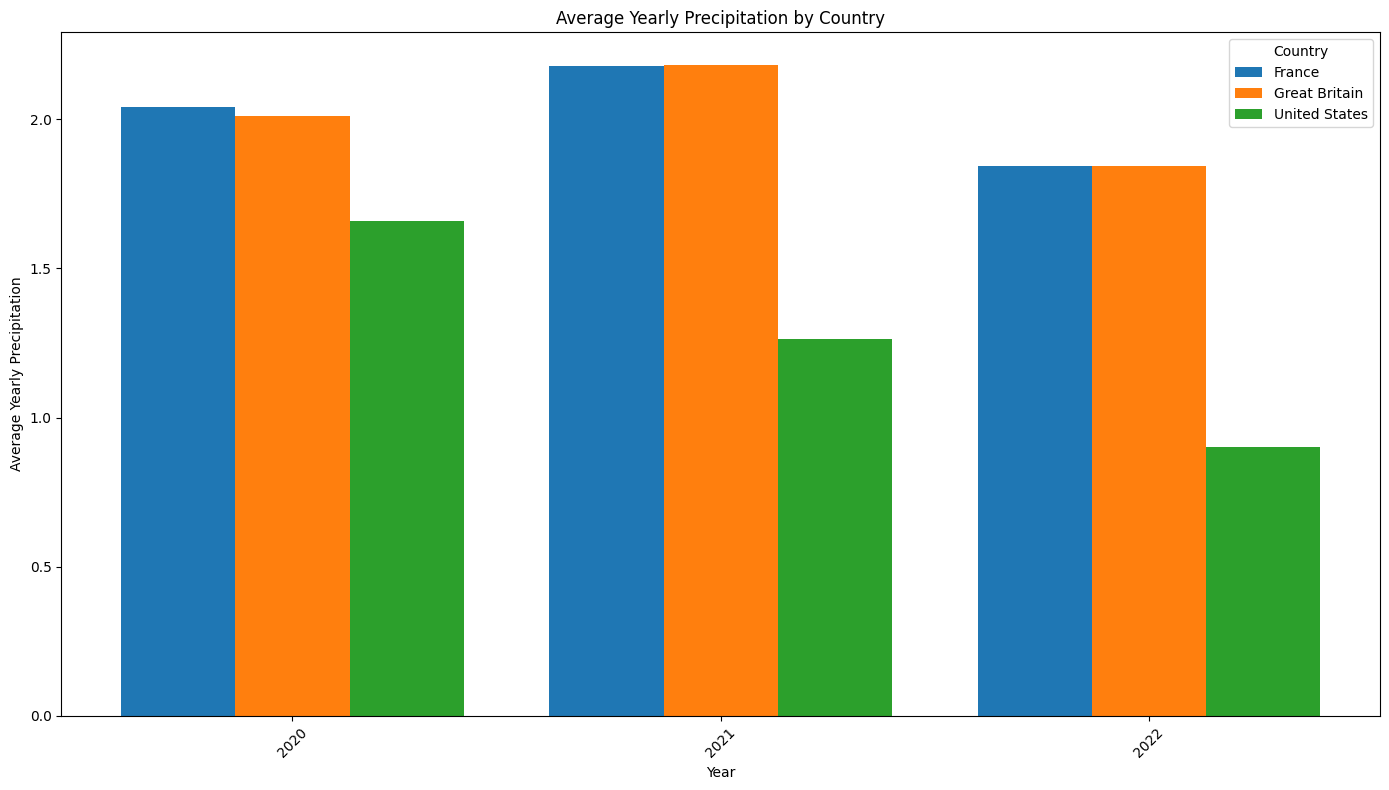

In [57]:
# Bar chart for average precipitation by country
years = sorted(df['year'].unique())
countries = df['country'].unique()
bar_width = 0.8 / len(countries)  # Adjust bar width based on the number of countries
positions = list(range(len(years)))

# Plotting the data
plt.figure(figsize=(14, 8))

for i, country in enumerate(countries):
    country_df = df[df['country'] == country]
    bar_positions = [p + i * bar_width for p in positions]
    plt.bar(bar_positions, country_df['avg_yearly_precipitation'], width=bar_width, label=country)

# Set up the x-axis with year labels positioned at the center of the groups of bars
plt.xlabel('Year')
plt.ylabel('Average Yearly Precipitation')
plt.title('Average Yearly Precipitation by Country')
plt.xticks([p + (len(countries) - 1) * bar_width / 2 for p in positions], years, rotation=45)
plt.legend(title='Country')
plt.tight_layout()
plt.show()
